### This plots the outputs from the partial mantel and generates figure 6A
- The outputs from the partial mantel test are found in the data folder
- We also provide the partial mantel code used to generate these (a partial mantel test was run to regress out the effects of memory performance)

In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import nibabel as nib
import mantel
from statsmodels.stats.multitest import multipletests
from nilearn.plotting import plot_glass_brain, plot_stat_map,  view_img, view_img_on_surf, plot_surf, plot_surf_stat_map, plot_surf_roi, plot_surf_contours, view_surf
from nilearn.surface import vol_to_surf
from nilearn import datasets
fsaverage = datasets.fetch_surf_fsaverage()

/dartfs-hpc/rc/home/9/f004p59/.local/lib/python3.7/site-packages/nilearn/datasets/__init__.py:89: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


### Import functions that are used here:

In [10]:
from USE_event_boundaries_helper_functions import linear_model_USE, get_node_r_val, color_rois, plot_isrsa_contours, plot_isrsa_contours_ite, plot_isrsa_contours_lem


## p<.05 to find shared regions across comparisons

In [3]:
shared_regions = [99, 92, 23]

## Shared with alignment

In [4]:
def shared_with_alignment(mov):
    '''USING ROIS FROM FIGURE 2'''
    '''from the calculate_ROIs_Fig1_Fig2_Fig5.ipynb script'''
    if mov =='growth':
        node = [40, 28]
    if mov == 'lemonade':
        node = [65, 74, 28]
    if mov == 'defeat':
        node = [97, 73, 74, 80, 92]
    if mov =='iteration':
        node = [99, 71, 40, 74, 11, 12, 14, 22, 56]
    return node

In [5]:
shared_with_alignment('growth')

[40, 28]

### Adding in the 3 SOCIAL to the figure with the FDR corrected regions (within-movie)

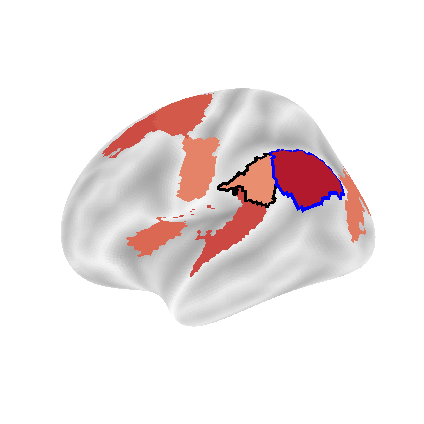

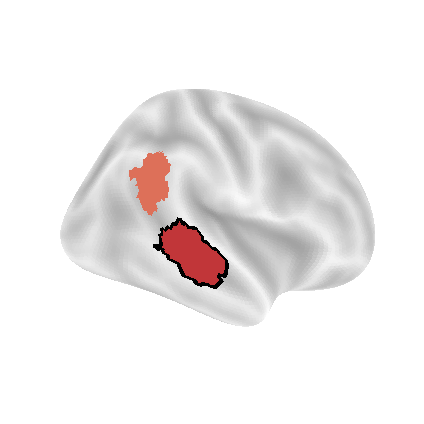

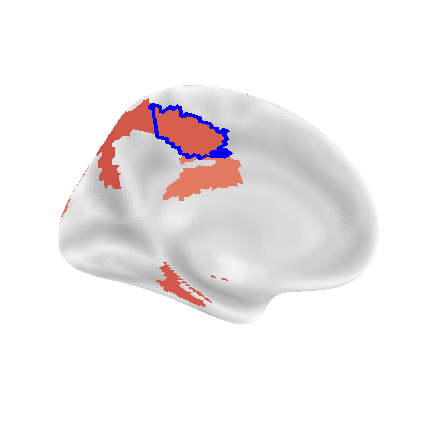

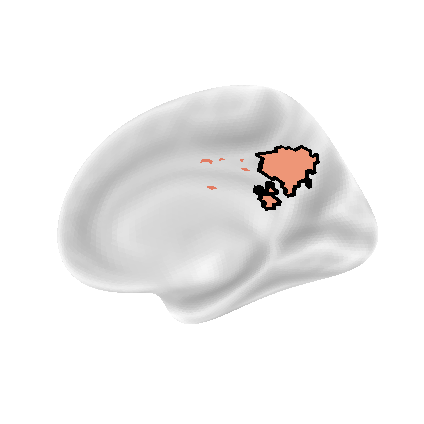

In [11]:
mov = 'growth'
plotting_a= linear_model_USE(mov)
plotting_a

node_vals = get_node_r_val(shared_regions,mov)
nodes_to_color = []
for x,val in enumerate(shared_regions):
    plotting_a[val] = node_vals[x]

if 92 in shared_regions:
    idx = shared_regions.index(92)
rois_ = []
shared_total = shared_regions + shared_with_alignment(mov)
for node in range(100):
    if node in shared_regions:
        nodes_to_color.append(1)
    elif node in shared_with_alignment(mov):
        nodes_to_color.append(2)
    else:
        nodes_to_color.append(0)

isrsa_mantel_r2_brain = color_rois(plotting_a)

plot_isrsa_contours(isrsa_mantel_r2_brain,nodes_to_color,mov,colorbar=False,vmin=-.17,vmax=.17)

23
99


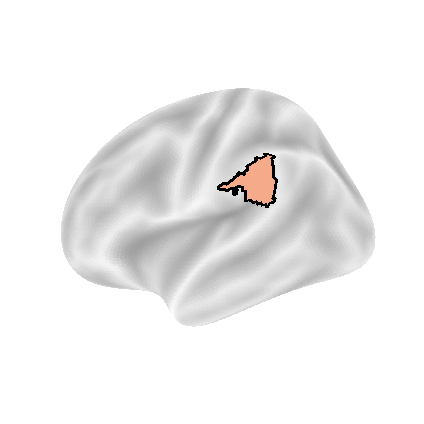

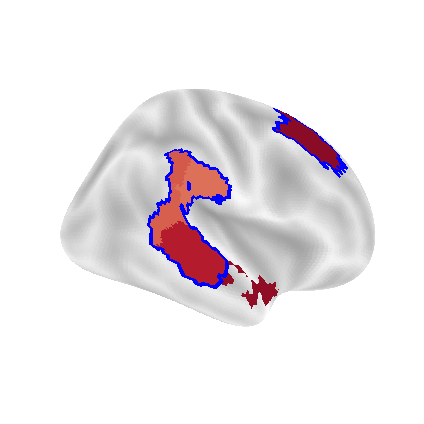

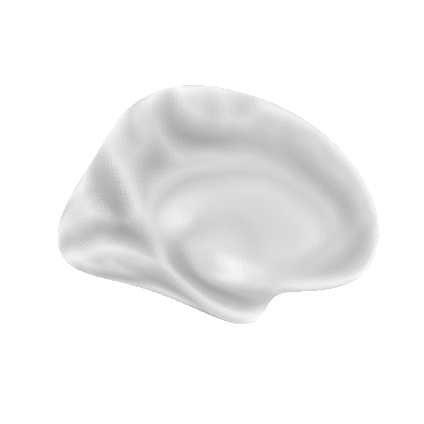

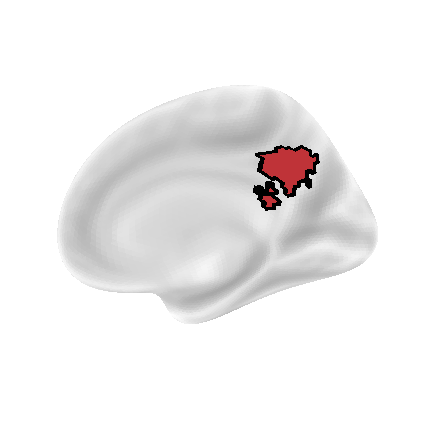

In [12]:
mov = 'defeat'
plotting_a= linear_model_USE(mov)
plotting_a

node_vals = get_node_r_val(shared_regions,mov)
nodes_to_color = []
for x,val in enumerate(shared_regions):
    plotting_a[val] = node_vals[x]

shared_total = shared_regions + shared_with_alignment(mov)
for node in range(100):
    if node == 92:
        nodes_to_color.append(2)
    elif node in shared_regions:
        print(node)
        nodes_to_color.append(1)
    elif node in shared_with_alignment(mov):
        nodes_to_color.append(2)
    else:
        nodes_to_color.append(0)
    

isrsa_mantel_r2_brain = color_rois(plotting_a)

plot_isrsa_contours(isrsa_mantel_r2_brain,nodes_to_color,mov,colorbar=False,vmin=-.17,vmax=.17)

99


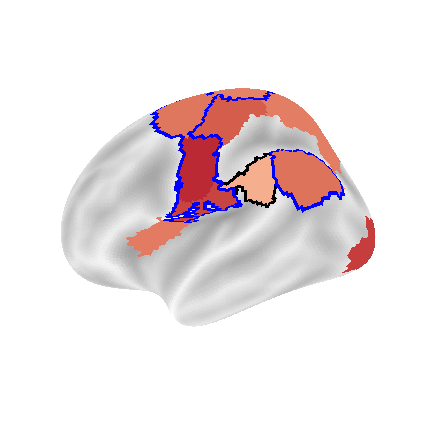

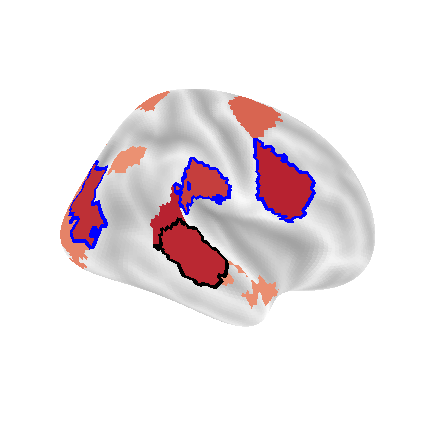

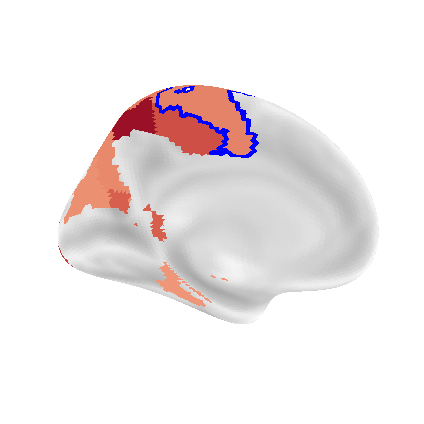

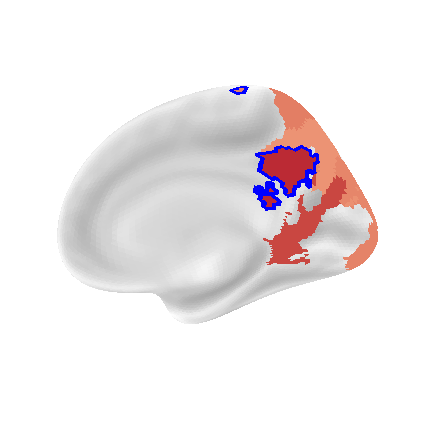

In [14]:
mov = 'iteration'
plotting_a= linear_model_USE(mov)
plotting_a

node_vals = get_node_r_val(shared_regions,mov)
nodes_to_color = []
for x,val in enumerate(shared_regions):
    plotting_a[val] = node_vals[x]

shared_total = shared_regions + shared_with_alignment(mov)
for node in range(100):
    if node in set(shared_regions).intersection(set(shared_with_alignment(mov))):
        print(node)
        nodes_to_color.append(2)
    elif node in shared_regions:
        nodes_to_color.append(1)
    elif node in shared_with_alignment(mov):
        nodes_to_color.append(2)
    else:
        nodes_to_color.append(0)

isrsa_mantel_r2_brain = color_rois(plotting_a)

plot_isrsa_contours_ite(isrsa_mantel_r2_brain,nodes_to_color,mov,colorbar=False,vmin=-.17,vmax=.17)


[65, 74, 28]


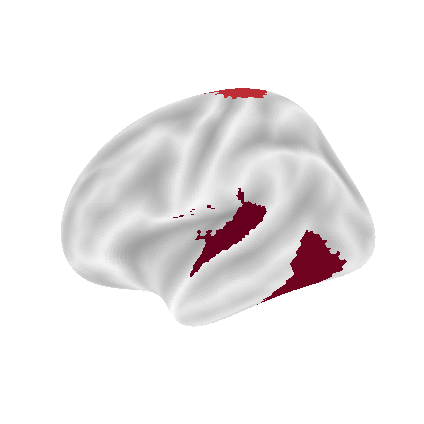

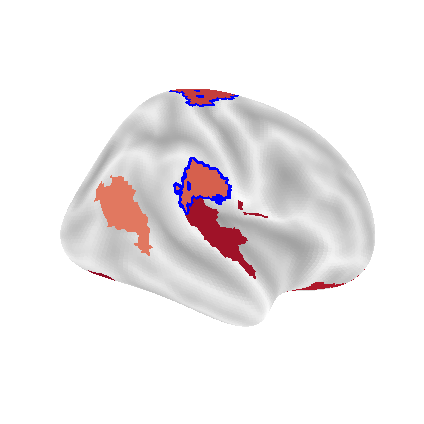

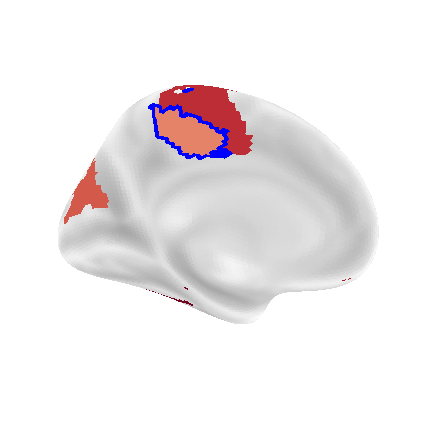

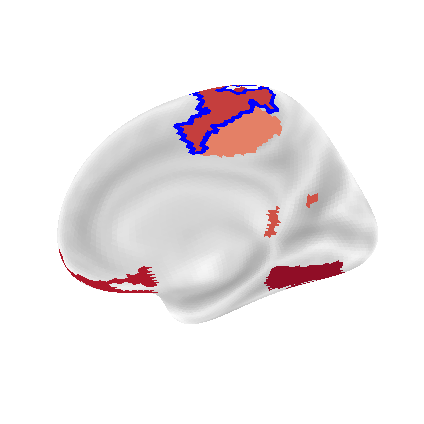

In [15]:
mov = 'lemonade'
plotting_a= linear_model_USE(mov)

nodes_to_color = []
shared_total = shared_with_alignment(mov)
print(shared_total)
for node in range(100):
    if node in shared_total:
        nodes_to_color.append(2)
    else:
        nodes_to_color.append(0)
isrsa_mantel_r2_brain = color_rois(plotting_a)

plot_isrsa_contours_lem(isrsa_mantel_r2_brain,nodes_to_color, mov, colorbar=False,vmin=-.17,vmax=.17)
